# Figures about contributions from Charlevoix

The goal of this Jupyter notebook is to produce Figure 4 and Supplementary Figures 6 and 7, which use the founders' genetic contributions from Charlevoix.

In [1]:
import json
import pickle
import warnings
warnings.filterwarnings('ignore')

from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import seaborn as sns

The paths to the datasets are found in the *paths.json* file.

In [2]:
with open("../paths.json", 'r') as file:
    paths = json.load(file)

Let's load the founders' genetic contributions which were already computed at step 5 of the BALSAC scripts.

In [3]:
with open(paths['wd'] + "results/pickles/balsac_contributions.pkl", 'rb') as file:
    df = pickle.load(file)
df["Region"] = df["Region"].apply(lambda x: x if x != 0 else "Unknown")
df["Origin"] = df["Origin"].apply(lambda x: x if x != 0 else "Unknown")

Compute the mean expected genetic contribution from Charlevoix for each municipality of Saguenay–Lac-Saint-Jean.

In [4]:
total_gc_per_city = df.copy()
charlevoix_gc_per_city = total_gc_per_city[total_gc_per_city["Region"] == "Charlevoix"].copy()
charlevoix_gc_per_city.drop(columns=["Founder ID", "Year", "Region", "Origin", "Watercourse"], inplace=True)
charlevoix_gc_per_city = charlevoix_gc_per_city.groupby(by="Municipality").sum()
total_gc_per_city.drop(columns=["Founder ID", "Year", "Region", "Origin", "Watercourse"], inplace=True)
total_gc_per_city = total_gc_per_city.groupby(by="Municipality").sum()
ratio = charlevoix_gc_per_city / total_gc_per_city
ratio

Individual GC
Municipality                                        
Albanel                                     0.342716
Alma                                        0.655540
Arvida                                      0.356110
Bégin                                       0.700200
Chambord                                    0.593004
...                                              ...
Sainte-Jeanne-d'Arc-du-Lac-Saint-Jean       0.568830
Sainte-Monique-de-Honfleur                  0.589304
Sainte-Rose-du-Nord                         0.805990
Sainte-Élisabeth-de-Proulx                  0.609573
Shipshaw                                    0.647500

[63 rows x 1 columns]

The following CSV associates each municipality with a central pair of coordinates.

In [5]:
with open(paths['latitudes_longitudes'], 'rb') as file:
    territories = pd.read_csv(file, sep=';')
territories

TerritoireID                Nom          Long          Lat
0             2757           Aguanish      -62,0863      50,2243
1             2758            Albanel      -72,4488      48,8901
2             2759               Alma      -71,6533      48,5466
3             2760              Amqui      -67,4287      48,4645
4             2761  L'Anse-Saint-Jean      -70,2092      48,2355
...            ...                ...           ...          ...
1566         22270           Arkansas  -91,87304892  34,90739935
1567         22271              Maine  -69,69333683  45,53025772
1568         22272      Massachusetts  -71,69157024  42,16509501
1569         22273    Nouveau Mexique  -106,2816924  34,41711913
1570         22274            Vermont  -72,37018948  43,99606998

[1571 rows x 4 columns]

The municipalities are each attributed a watercourse subdivision.

In [6]:
city_to_subdivision = {
    "Albanel": "Ashuapmushuan-Mistassini",
    "Alma": "East of Lac Saint-Jean",
    "Arvida": "South of Saguenay River",
    "Bégin": "North of Saguenay River",
    "Chambord": "Métabetchouane-Ashuapmushuan",
    "Chicoutimi": "South of Saguenay River",
    "Chicoutimi-Nord": "North of Saguenay River",
    "Chute-des-Passes": "Mistassini-Péribonka",
    "Delisle": "East of Lac Saint-Jean",
    "Desbiens": "La-Belle-Rivière–Métabetchouane",
    "Dolbeau": "Ashuapmushuan-Mistassini",
    "Ferland-et-Boilleau": "South of Saguenay River",
    "Girardville": "Ashuapmushuan-Mistassini",
    "Hébertville": "East of Lac Saint-Jean",
    "Hébertville-Station": "East of Lac Saint-Jean",
    "Jonquière": "South of Saguenay River",
    "L'Anse-Saint-Jean": "East of Ha! Ha!",
    "L'Ascension-de-Notre-Seigneur": "East of Lac Saint-Jean",
    "La Baie": "South of Saguenay River",
    "La Doré": "Métabetchouane-Ashuapmushuan",
    "Labrecque": "East of Lac Saint-Jean",
    "Lac-Bouchette": "Métabetchouane-Ashuapmushuan",
    "Lac-Kénogami": "South of Saguenay River",
    "Lac-à-la-Croix": "La-Belle-Rivière–Métabetchouane",
    "Larouche": "South of Saguenay River",
    "Laterrière": "South of Saguenay River",
    "Mashteuiatsh": "Métabetchouane-Ashuapmushuan",
    "Mistassini": "Mistassini-Péribonka",
    "Métabetchouan": "La-Belle-Rivière–Métabetchouane",
    "Mont-Apica": "East of Lac Saint-Jean",
    "Normandin": "Ashuapmushuan-Mistassini",
    "Notre-Dame-de-Lorette": "Mistassini-Péribonka",
    "Notre-Dame-du-Rosaire": "East of Lac Saint-Jean",
    "Petit-Saguenay": "East of Ha! Ha!",
    "Péribonka": "Mistassini-Péribonka",
    "Rivière-Éternité": "East of Ha! Ha!",
    "Roberval": "Métabetchouane-Ashuapmushuan",
    "Saint-Ambroise": "North of Saguenay River",
    "Saint-André-du-Lac-Saint-Jean": "La-Belle-Rivière–Métabetchouane",
    "Saint-Augustin-du-Lac-Saint-Jean": "Mistassini-Péribonka",
    "Saint-Bruno": "East of Lac Saint-Jean",
    "Saint-Charles-de-Bourget": "North of Saguenay River",
    "Saint-David-de-Falardeau": "North of Saguenay River",
    "Saint-Edmond": "Ashuapmushuan-Mistassini",
    "Saint-Eugène-du-Lac-Saint-Jean": "Mistassini-Péribonka",
    "Saint-François-de-Sales": "Métabetchouane-Ashuapmushuan",
    "Saint-Fulgence": "North of Saguenay River",
    "Saint-Félicien": "Métabetchouane-Ashuapmushuan",
    "Saint-Félix-d'Otis": "East of Ha! Ha!",
    "Saint-Gédéon": "East of Lac Saint-Jean",
    "Saint-Henri-de-Taillon": "East of Lac Saint-Jean",
    "Saint-Honoré-de-Chicoutimi": "North of Saguenay River",
    "Saint-Ludger-de-Milot": "Mistassini-Péribonka",
    "Saint-Méthode": "Ashuapmushuan-Mistassini",
    "Saint-Nazaire": "East of Lac Saint-Jean",
    "Saint-Prime": "Ashuapmushuan-Mistassini",
    "Saint-Stanislas-du-Lac-Saint-Jean": "Mistassini-Péribonka",
    "Saint-Thomas-Didyme": "Ashuapmushuan-Mistassini",
    "Sainte-Hedwidge": "Métabetchouane-Ashuapmushuan",
    "Sainte-Jeanne-d'Arc-du-Lac-Saint-Jean": "Mistassini-Péribonka",
    "Sainte-Monique-de-Honfleur": "East of Lac Saint-Jean",
    "Sainte-Rose-du-Nord": "North of Saguenay River",
    "Sainte-Élisabeth-de-Proulx": "Mistassini-Péribonka",
    "Shipshaw": "North of Saguenay River",
    "Val-Jalbert": "Métabetchouane-Ashuapmushuan",
    'Baie-Sainte-Catherine': 'Charlevoix',
    'Baie-Saint-Paul': 'Charlevoix',
    "Cap A L'aigle": 'Charlevoix',
    'Clermont': 'Charlevoix',
    'La Malbaie': 'Charlevoix',
    'Les Éboulements': 'Charlevoix',
    'Notre Dame Des Monts': 'Charlevoix',
    'Petite-Rivière-Saint-François': 'Charlevoix',
    'Pointe-au-Pic': 'Charlevoix',
    'St Aime Des Lacs': 'Charlevoix',
    "Saint-Bernard-de-l'Isle-aux-Coudres": 'Charlevoix',
    'Sainte-Agnès': 'Charlevoix',
    'Saint-Fidèle-de-Mont-Murray': 'Charlevoix',
    'Saint-Hilarion': 'Charlevoix',
    'Saint-Irénée': 'Charlevoix',
    'Saint-Joseph-de-la-Rive': 'Charlevoix',
    "Saint-Louis-de-l'Isle-aux-Coudres": 'Charlevoix',
    'Saint-Siméon': 'Charlevoix',
    'Saint-Urbain-de-Charlevoix': 'Charlevoix'
}

Each watercourse subdivision is attributed a distinct colour.

In [7]:
subdivision_to_colour = {
    "East of Ha! Ha!": 'gold',
    "South of Saguenay River": 'lime',
    "North of Saguenay River": 'deeppink',
    "East of Lac Saint-Jean": 'darkgreen',
    "La-Belle-Rivière–Métabetchouane": 'aqua',
    "Mistassini-Péribonka": 'rosybrown',
    "Métabetchouane-Ashuapmushuan": 'dodgerblue',
    "Ashuapmushuan-Mistassini": '#a020f0'
}

The datasets are merged to obtain a single DataFrame.

In [8]:
table = pd.merge(ratio, territories, left_on='Municipality', right_on='Nom')
table.drop(columns=["TerritoireID"], inplace=True)
def period_instead_of_comma(string):
    return string.replace(',', '.')
table['Long'] = table['Long'].apply(period_instead_of_comma)
table['Long'] = table['Long'].astype(float)
table['Lat'] = table['Lat'].apply(period_instead_of_comma)
table['Lat'] = table['Lat'].astype(float)
table = pd.merge(
    table,
    df.groupby(by="Municipality")["Individual GC"].sum().astype(int),
    left_on="Nom",
    right_on="Municipality"
    )
table.columns = ["Mean expected genetic contribution from Charlevoix (%)", "Location of proband's marriage", "Longitude", "Latitude", "Population size"]
subdivision_df = pd.DataFrame(city_to_subdivision.items(), columns = ["Location of proband's marriage", "Subdivision"])
table = pd.merge(table, subdivision_df)
table['Mean expected genetic contribution from Charlevoix (%)'] *= 100
table

Mean expected genetic contribution from Charlevoix (%)  \
0                                           34.271565        
1                                           65.554013        
2                                           35.610973        
3                                           70.019977        
4                                           59.300373        
..                                                ...        
58                                          56.883024        
59                                          58.930361        
60                                          80.598958        
61                                          60.957278        
62                                          64.750000        

           Location of proband's marriage  Longitude  Latitude  \
0                                 Albanel   -72.4488   48.8901   
1                                    Alma   -71.6533   48.5466   
2                                  Arvida   -71.1796   48.4296   
3                                   Bégin   -71.3620   48.6725   
4                                Chambord   -72.0662   48.4282   
..                                    ...        ...       ...   
58  Sainte-Jeanne-d'Arc-du-Lac-Saint-Jean   -72.0849   48.8637   
59             Sainte-Monique-de-Honfleur   -71.8576   48.7432   
60                    Sainte-Rose-du-Nord   -70.5942   48.3887   
61             Sainte-Élisabeth-de-Proulx   -72.0606   48.9696   
62                               Shipshaw   -71.2228   48.4718   

    Population size                   Subdivision  
0               997      Ashuapmushuan-Mistassini  
1              5899        East of Lac Saint-Jean  
2              4010       South of Saguenay River  
3               438       North of Saguenay River  
4               670  Métabetchouane-Ashuapmushuan  
..              ...                           ...  
58              701          Mistassini-Péribonka  
59              499        East of Lac Saint-Jean  
60              168       North of Saguenay River  
61              237          Mistassini-Péribonka  
62              475       North of Saguenay River  

[63 rows x 6 columns]

The resulting DataFrame may be exported as a new CSV file.

In [9]:
table.sort_values(by="Longitude").to_csv(paths['wd'] + "results/CharlevoixGradient.csv", index=False)

Plot the genetic contributions from Charlevoix in function of longitude.

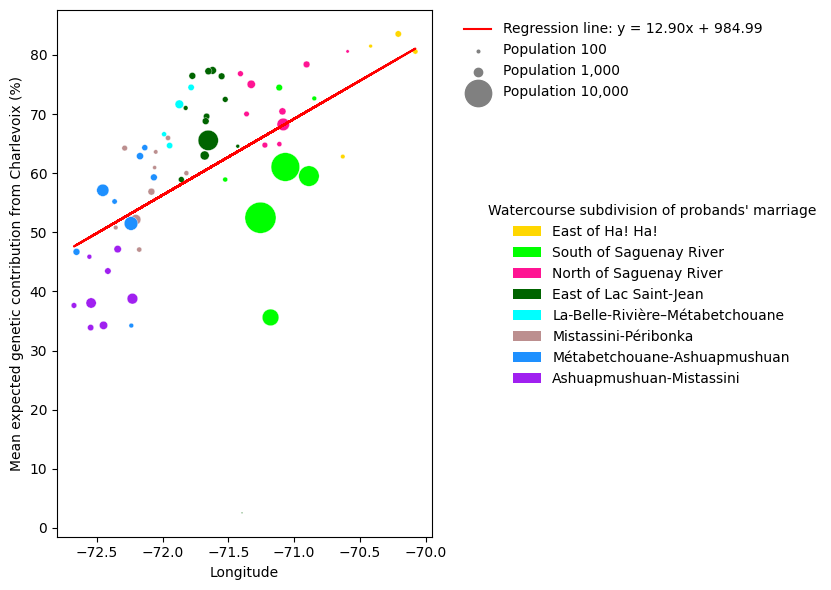

In [10]:
# Sample data
x_label = 'Longitude'
y_label = 'Mean expected genetic contribution from Charlevoix (%)'
z_label = 'Population size'

# Prepare regression
x = table[x_label]
y = table[y_label]
m, c = np.polyfit(x, y, 1)
y_pred = m * x + c

# Start figure
fig, ax = plt.subplots(figsize=(8, 6))

# Seaborn scatter plot
sns.scatterplot(
    data=table,
    x=x_label,
    y=y_label,
    hue='Subdivision',
    palette=subdivision_to_colour,
    size=z_label,
    sizes=(0, 500),
    legend=False,
    ax=ax
)

# Regression line
ax.plot(x, y_pred, color='red', label=f'Regression line: y = {m:.2f}x + {c:.2f}')

# Axis labels
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

# Aspect ratio
ax.set_aspect('auto', adjustable='box')

# Manual size legend
for size in [100, 1000, 10000]:
    ax.scatter([], [], s=size/(table['Population size'].max())*500, c='gray',
               label=f'Population {size:,}')

# External legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)

# Create a list of legend elements
legend_elements = [Patch(facecolor=color, label=water_boundary)
                   for water_boundary, color in subdivision_to_colour.items()]

# Legend outside the plot
legend_handle = fig.legend(handles=legend_elements, bbox_to_anchor=(0.6, 0.5),
                           loc='center left', frameon=False)

legend_handle.set_title("Watercourse subdivision of probands' marriage")

# Layout and save
plt.tight_layout()
plt.show()

Compute the linear regression.

In [11]:
linregress(x,y)

LinregressResult(slope=12.898485210529094, intercept=984.992750298671, rvalue=0.5172134377363912, pvalue=1.4225559696511063e-05, stderr=2.7327815680911827, intercept_stderr=195.92374816096194)

Plot the genetic contributions from Charlevoix in function of latitude.

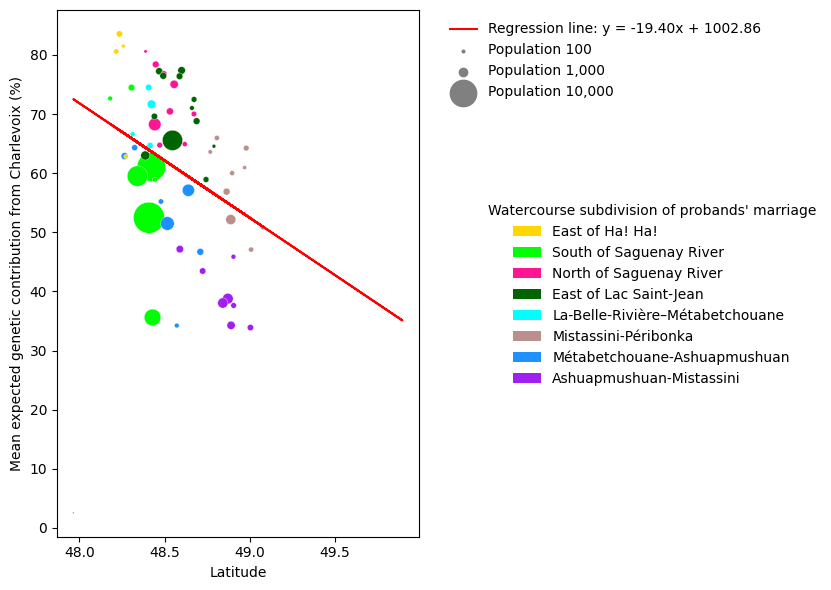

In [12]:
# Sample data
x_label = 'Latitude'
y_label = 'Mean expected genetic contribution from Charlevoix (%)'
z_label = 'Population size'

# Prepare regression
x = table[x_label]
y = table[y_label]
m, c = np.polyfit(x, y, 1)
y_pred = m * x + c

# Start figure
fig, ax = plt.subplots(figsize=(8, 6))

# Seaborn scatter plot
sns.scatterplot(
    data=table,
    x=x_label,
    y=y_label,
    hue='Subdivision',
    palette=subdivision_to_colour,
    size=z_label,
    sizes=(0, 500),
    legend=False,
    ax=ax
)

# Regression line
ax.plot(x, y_pred, color='red', label=f'Regression line: y = {m:.2f}x + {c:.2f}')

# Axis labels
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)

# Aspect ratio
ax.set_aspect('auto', adjustable='box')

# Manual size legend
for size in [100, 1000, 10000]:
    ax.scatter([], [], s=size/(table['Population size'].max())*500, c='gray',
               label=f'Population {size:,}')

# External legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), frameon=False)

# Create a list of legend elements
legend_elements = [Patch(facecolor=color, label=water_boundary)
                   for water_boundary, color in subdivision_to_colour.items()]

# Legend outside the plot
legend_handle = fig.legend(handles=legend_elements, bbox_to_anchor=(0.6, 0.5),
                           loc='center left', frameon=False)

legend_handle.set_title("Watercourse subdivision of probands' marriage")

# Layout and save
plt.tight_layout()
plt.show()

Compute the linear regression.

In [13]:
linregress(x,y)

LinregressResult(slope=-19.39611906454897, intercept=1002.8632678523247, rvalue=-0.36616516797155163, pvalue=0.0031634898978343986, stderr=6.311208820160482, intercept_stderr=306.7066108611087)

Order the subdivisions from East to West.

In [14]:
east_west = [
    'Ashuapmushuan-Mistassini',
    'Métabetchouane-Ashuapmushuan',
    'Mistassini-Péribonka',
    'La-Belle-Rivière–Métabetchouane',
    'East of Lac Saint-Jean',
    'North of Saguenay River',
    'South of Saguenay River',
    'East of Ha! Ha!',
]

Filter and prepare the DataFrame.

In [15]:
current_df = df.drop(['Founder ID', 'Year', 'Region'], axis=1)
current_df

Origin  Individual GC               Watercourse  \
0                          Ste Foy           0.50      Mistassini-Péribonka   
1                  Baie-Saint-Paul           0.25      Mistassini-Péribonka   
2                  Baie-Saint-Paul           0.25      Mistassini-Péribonka   
3                           Quebec           1.00   South of Saguenay River   
4                  Baie-Saint-Paul           1.00   South of Saguenay River   
...                            ...            ...                       ...   
377670                  La Malbaie           0.25   South of Saguenay River   
377671         St Paul De Montminy           1.00  Ashuapmushuan-Mistassini   
377672                     Unknown           1.00   South of Saguenay River   
377673                     Unknown           1.00   South of Saguenay River   
377674  Saint-Urbain-de-Charlevoix           1.00  Ashuapmushuan-Mistassini   

       Municipality  
0        Mistassini  
1        Mistassini  
2        Mistassini  
3            Arvida  
4           La Baie  
...             ...  
377670   Chicoutimi  
377671  Girardville  
377672    Jonquière  
377673    Jonquière  
377674    Normandin  

[377675 rows x 4 columns]

Get the sum of genetic contributions for each watercourse subdivision.

In [16]:
total_per_watercourse = current_df.drop(['Origin'], axis=1).groupby('Watercourse').sum()
total_per_watercourse

Individual GC  \
Watercourse                                      
Ashuapmushuan-Mistassini                6960.0   
East of Ha! Ha!                         1498.0   
East of Lac Saint-Jean                 12807.0   
La-Belle-Rivière–Métabetchouane         2605.0   
Mistassini-Péribonka                    4624.0   
Métabetchouane-Ashuapmushuan            8202.0   
North of Saguenay River                 6599.0   
South of Saguenay River                37053.0   

                                                                      Municipality  
Watercourse                                                                         
Ashuapmushuan-Mistassini         Saint-MéthodeSaint-MéthodeSaint-MéthodeSaint-M...  
East of Ha! Ha!                  Saint-Félix-d'OtisSaint-Félix-d'OtisSaint-Féli...  
East of Lac Saint-Jean           AlmaAlmaAlmaAlmaAlmaAlmaAlmaAlmaAlmaAlmaAlmaHé...  
La-Belle-Rivière–Métabetchouane  Lac-à-la-CroixLac-à-la-CroixLac-à-la-CroixLac-...  
Mistassini-Péribonka             MistassiniMistassiniMistassiniSaint-Eugène-du-...  
Métabetchouane-Ashuapmushuan     Saint-FélicienSaint-FélicienSaint-FélicienSain...  
North of Saguenay River          Saint-David-de-FalardeauSaint-David-de-Falarde...  
South of Saguenay River          ArvidaLa BaieArvidaLa BaieJonquièreJonquièreJo...

Create a pivot table with summed contributions for Charlevoix municipalities.

In [17]:
charlevoix_grouped = df[df['Region'] == 'Charlevoix'].drop(['Founder ID', 'Year', 'Region'], axis=1).pivot_table(
    index='Watercourse',
    columns='Origin',
    values='Individual GC',
    aggfunc='sum'
).fillna(0)
charlevoix_grouped = charlevoix_grouped.apply(lambda x: x / total_per_watercourse['Individual GC'])
charlevoix_grouped

Origin                           Baie-Saint-Paul  Baie-Sainte-Catherine  \
Watercourse                                                               
Ashuapmushuan-Mistassini                0.127128               0.000144   
East of Ha! Ha!                         0.147989               0.003004   
East of Lac Saint-Jean                  0.189742               0.000468   
La-Belle-Rivière–Métabetchouane         0.263232               0.000768   
Mistassini-Péribonka                    0.146228               0.000649   
Métabetchouane-Ashuapmushuan            0.179034               0.000244   
North of Saguenay River                 0.153380               0.000606   
South of Saguenay River                 0.136523               0.001592   

Origin                           Clermont  La Malbaie  Les Éboulements  \
Watercourse                                                              
Ashuapmushuan-Mistassini         0.000000    0.091559         0.050247   
East of Ha! Ha!                  0.000000    0.207047         0.337387   
East of Lac Saint-Jean           0.000000    0.202875         0.075657   
La-Belle-Rivière–Métabetchouane  0.000000    0.183097         0.071137   
Mistassini-Péribonka             0.000000    0.132785         0.090526   
Métabetchouane-Ashuapmushuan     0.000122    0.122535         0.083642   
North of Saguenay River          0.000152    0.258931         0.138170   
South of Saguenay River          0.000108    0.194985         0.094982   

Origin                           Petite-Rivière-Saint-François  Pointe-au-Pic  \
Watercourse                                                                     
Ashuapmushuan-Mistassini                              0.022302       0.000144   
East of Ha! Ha!                                       0.003505       0.000000   
East of Lac Saint-Jean                                0.014414       0.000078   
La-Belle-Rivière–Métabetchouane                       0.018078       0.000000   
Mistassini-Péribonka                                  0.015895       0.000649   
Métabetchouane-Ashuapmushuan                          0.033387       0.000122   
North of Saguenay River                               0.009926       0.000909   
South of Saguenay River                               0.008844       0.001080   

Origin                           Saint-Bernard-de-l'Isle-aux-Coudres  \
Watercourse                                                            
Ashuapmushuan-Mistassini                                    0.000000   
East of Ha! Ha!                                             0.000000   
East of Lac Saint-Jean                                      0.000000   
La-Belle-Rivière–Métabetchouane                             0.000000   
Mistassini-Péribonka                                        0.000216   
Métabetchouane-Ashuapmushuan                                0.000000   
North of Saguenay River                                     0.000000   
South of Saguenay River                                     0.000000   

Origin                           Saint-Fidèle-de-Mont-Murray  Saint-Hilarion  \
Watercourse                                                                    
Ashuapmushuan-Mistassini                            0.002676        0.016451   
East of Ha! Ha!                                     0.002670        0.000668   
East of Lac Saint-Jean                              0.002499        0.007633   
La-Belle-Rivière–Métabetchouane                     0.001344        0.005566   
Mistassini-Péribonka                                0.005515        0.013354   
Métabetchouane-Ashuapmushuan                        0.004816        0.007468   
North of Saguenay River                             0.010096        0.008638   
South of Saguenay River                             0.002780        0.009598   

Origin                           Saint-Irénée  Saint-Joseph-de-la-Rive  \
Watercourse                                                              
Ashuapmushuan-Mistassini   

Create a pivot table with summed contributions for regions of Quebec.

In [18]:
quebec_grouped = df.drop(['Founder ID', 'Year', 'Region'], axis=1).pivot_table(
    index='Watercourse',
    columns='Origin',
    values='Individual GC',
    aggfunc='sum'
).fillna(0)
quebec_grouped = quebec_grouped.apply(lambda x: x / total_per_watercourse['Individual GC'])
quebec_grouped

Origin                           Abitibi Comte  Acton Vale  Amesbury  \
Watercourse                                                            
Ashuapmushuan-Mistassini              0.000790    0.000287  0.000144   
East of Ha! Ha!                       0.000000    0.000000  0.000000   
East of Lac Saint-Jean                0.000000    0.000000  0.000078   
La-Belle-Rivière–Métabetchouane       0.000000    0.000000  0.000000   
Mistassini-Péribonka                  0.000000    0.000000  0.000000   
Métabetchouane-Ashuapmushuan          0.000000    0.000000  0.000000   
North of Saguenay River               0.000000    0.000152  0.000152   
South of Saguenay River               0.000054    0.000054  0.000459   

Origin                            Amherst      Amos     Amqui  \
Watercourse                                                     
Ashuapmushuan-Mistassini         0.000000  0.000144  0.000862   
East of Ha! Ha!                  0.000000  0.000000  0.000000   
East of Lac Saint-Jean           0.000000  0.000000  0.000468   
La-Belle-Rivière–Métabetchouane  0.000000  0.000000  0.000000   
Mistassini-Péribonka             0.000000  0.000216  0.001298   
Métabetchouane-Ashuapmushuan     0.000122  0.000732  0.001585   
North of Saguenay River          0.000000  0.000606  0.000227   
South of Saguenay River          0.000000  0.000270  0.001673   

Origin                           Ancienne Lorette  Ange Gardien  Annaville  \
Watercourse                                                                  
Ashuapmushuan-Mistassini                 0.000647      0.001976   0.000000   
East of Ha! Ha!                          0.000000      0.002587   0.000000   
East of Lac Saint-Jean                   0.000625      0.002098   0.000351   
La-Belle-Rivière–Métabetchouane          0.000432      0.001775   0.000000   
Mistassini-Péribonka                     0.000027      0.001784   0.000000   
Métabetchouane-Ashuapmushuan             0.000876      0.001593   0.000000   
North of Saguenay River                  0.000464      0.002084   0.000000   
South of Saguenay River                  0.000727      0.003287   0.000027   

Origin                             Argyle  ...  Westbrook  Westmount  \
Watercourse                                ...                         
Ashuapmushuan-Mistassini         0.000000  ...   0.000000   0.000862   
East of Ha! Ha!                  0.000000  ...   0.000000   0.000000   
East of Lac Saint-Jean           0.000000  ...   0.000390   0.000000   
La-Belle-Rivière–Métabetchouane  0.000000  ...   0.000000   0.000000   
Mistassini-Péribonka             0.000000  ...   0.000000   0.000000   
Métabetchouane-Ashuapmushuan     0.000000  ...   0.000549   0.000122   
North of Saguenay River          0.000000  ...   0.002122   0.000000   
South of Saguenay River          0.000027  ...   0.000837   0.000432   

Origin                           White River Junction   Wickham   Windsor  \
Watercourse                                                                 
Ashuapmushuan-Mistassini                     0.000000  0.000000  0.000359   
East of Ha! Ha!                              0.000000  0.000000  0.000000   
East of Lac Saint-Jean                       0.000000  0.000000  0.000039   
La-Belle-Rivière–Métabetchouane              0.000000  0.000000  0.000000   
Mistassini-Péribonka                         0.000000  0.000000  0.000000   
Métabetchouane-Ashuapmushuan                 0.000000  0.000000  0.000000   
North of Saguenay River                      0.000000  0.000152  0.000152   
South of Saguenay River                      0.000054  0.000000  0.000364   

Origin                           Winthrop  Woodbridge  Woonsocket    Wotton  \
Watercourse                                                                   
Ashuapmushuan-Mistassini         0.000000    0.000000    0.000970  0.000000   
East of Ha! Ha!                  0.000000    0.000000    0.000000  0.000000   
East of Lac Saint-Jean           0.0000

Let's select the three most contributing Charlevoix municipalities and group the others.

In [19]:
charlevoix_cities = ["La Malbaie", "Baie-Saint-Paul", "Les Éboulements"]

Group the other regions into "Not in Charlevoix", and merge the values with rounding to one decimal place.

In [20]:
filtered_df = charlevoix_grouped.loc[:, charlevoix_cities]
filtered_df["Elsewhere in Charlevoix"] = charlevoix_grouped.drop(charlevoix_cities, axis=1).sum(axis=1)
filtered_df["Not in Charlevoix"] = quebec_grouped.drop(charlevoix_grouped.columns, axis=1).sum(axis=1)
filtered_df = filtered_df.loc[east_west]
filtered_df *= 100
filtered_df = round(filtered_df, 1)
filtered_df = filtered_df.loc[east_west]
filtered_df

Origin                           La Malbaie  Baie-Saint-Paul  Les Éboulements  \
Watercourse                                                                     
Ashuapmushuan-Mistassini                9.2             12.7              5.0   
Métabetchouane-Ashuapmushuan           12.3             17.9              8.4   
Mistassini-Péribonka                   13.3             14.6              9.1   
La-Belle-Rivière–Métabetchouane        18.3             26.3              7.1   
East of Lac Saint-Jean                 20.3             19.0              7.6   
North of Saguenay River                25.9             15.3             13.8   
South of Saguenay River                19.5             13.7              9.5   
East of Ha! Ha!                        20.7             14.8             33.7   

Origin                           Elsewhere in Charlevoix  Not in Charlevoix  
Watercourse                                                                  
Ashuapmushuan-Mistassini                            12.3               60.8  
Métabetchouane-Ashuapmushuan                        16.0               45.5  
Mistassini-Péribonka                                19.5               43.5  
La-Belle-Rivière–Métabetchouane                     18.3               29.9  
East of Lac Saint-Jean                              21.4               31.8  
North of Saguenay River                             16.1               28.8  
South of Saguenay River                             12.5               44.9  
East of Ha! Ha!                                      9.1               21.7

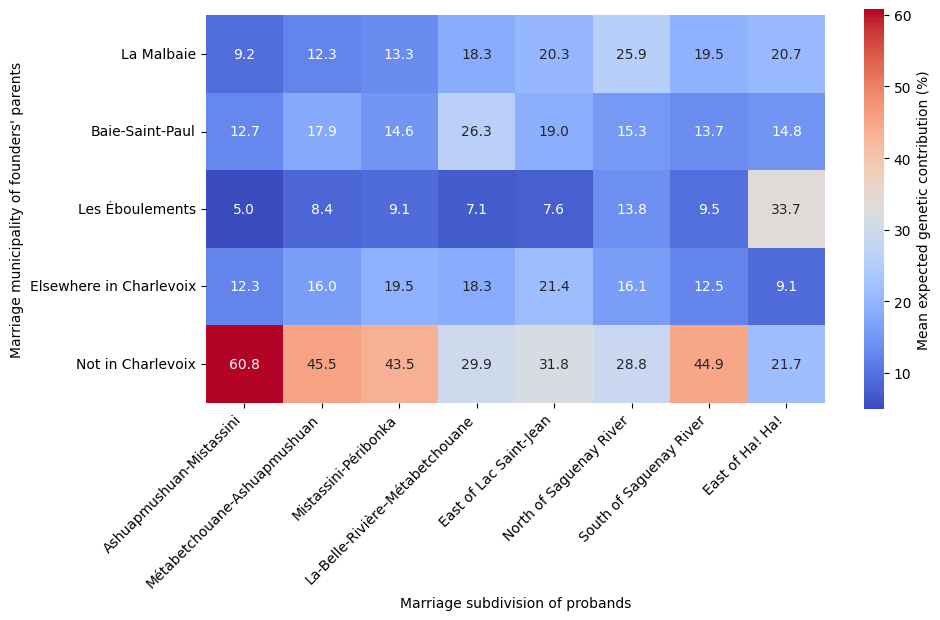

In [ ]:
# Adjust the size of the figure
plt.figure(figsize=(10, 6))

# Create a heatmap with square cells
sns.heatmap(filtered_df.T,
            annot=True,       # Display the values in each cell
            fmt=".1f",        # Format the values
            cmap="coolwarm",  # Colour palette
            cbar=True,
            cbar_kws={'label': 'Mean expected genetic contribution (%)'},  # Label of the colourbar
            square=True)      # Parameter to make the cells square

# Name the axes
plt.xlabel("Marriage subdivision of probands")
plt.ylabel("Marriage municipality of founders' parents")

# Rotate the x axis labels 45 degrees
plt.xticks(rotation=45, ha='right')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Let's merge the two figures above into a single figure with two subplots.

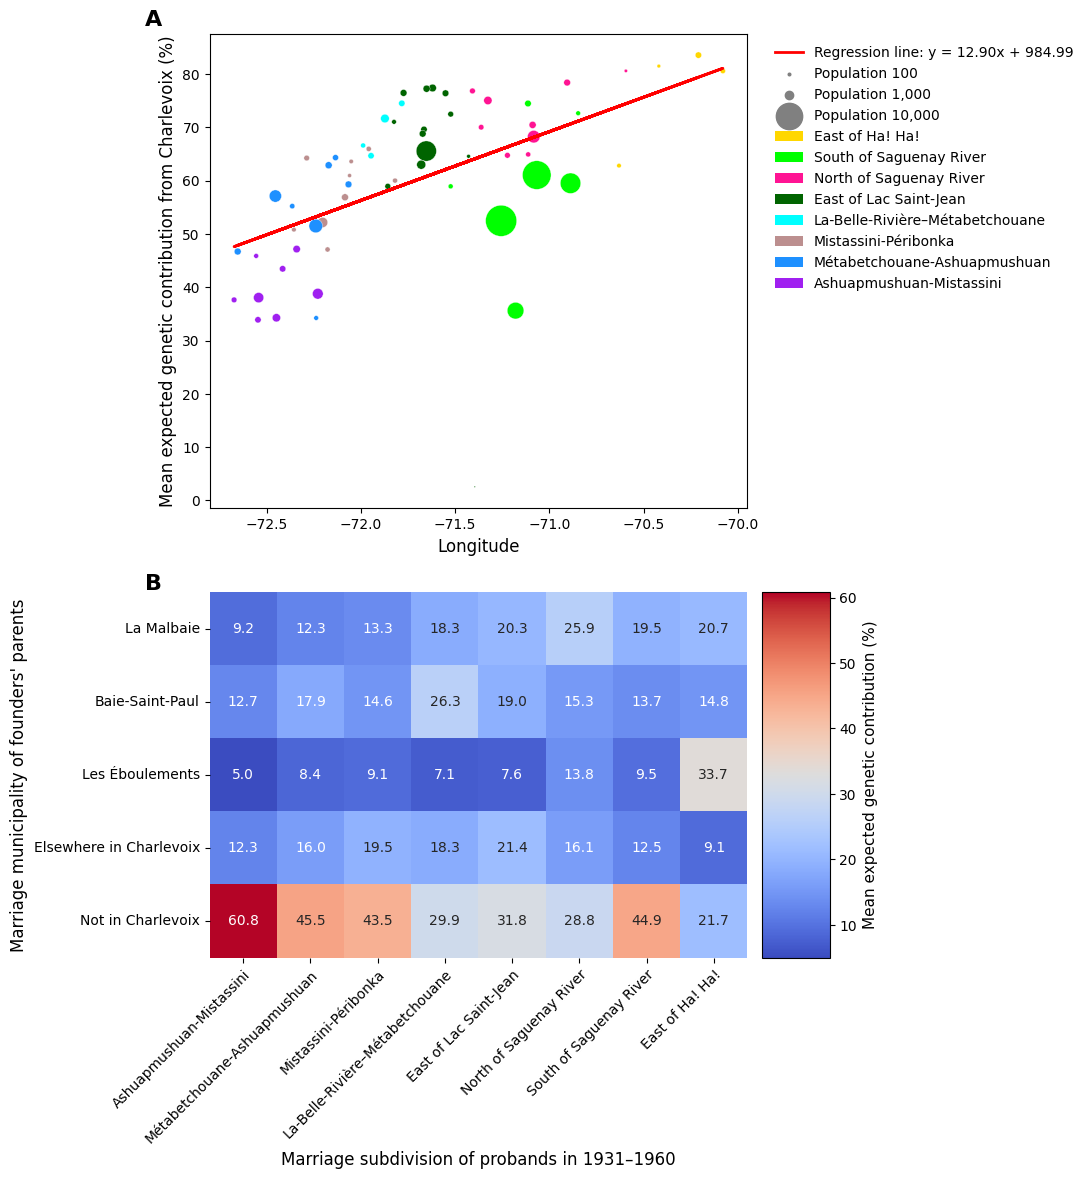

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
from matplotlib import gridspec

fig = plt.figure(figsize=(8, 12))

# Narrower column for legend/colorbar
gs = gridspec.GridSpec(
    2, 2,
    width_ratios=[8, 1],  # slimmer legend/cbar column
    height_ratios=[1.3, 1],
    figure=fig
)

# Axes
ax1 = fig.add_subplot(gs[0, 0])        # Scatter plot
ax2 = fig.add_subplot(gs[1, 0])        # Heatmap
ax_leg = fig.add_subplot(gs[0, 1])     # Legend
ax_cbar = fig.add_subplot(gs[1, 1])    # Colorbar

ax_leg.axis("off")  # hide background

# ==============================================================================
# Subplot A: Scatter plot
# ==============================================================================

x_label = 'Longitude'
y_label = 'Mean expected genetic contribution from Charlevoix (%)'
z_label = 'Population size'

x = table[x_label]
y = table[y_label]
m, c = np.polyfit(x, y, 1)
y_pred = m * x + c

sns.scatterplot(
    data=table,
    x=x_label, y=y_label,
    hue='Subdivision',
    palette=subdivision_to_colour,
    size=z_label,
    sizes=(0, 500),
    legend=False,
    ax=ax1
)

line_handle, = ax1.plot(
    x, y_pred, color='red', linewidth=2,
    label=f'Regression line: y = {m:.2f}x + {c:.2f}'
)

ax1.set_xlabel(x_label, fontsize=12)
ax1.set_ylabel(y_label, fontsize=12)
ax1.tick_params(labelsize=10)

# Legend
size_handles = [plt.scatter([], [], s=size/(table['Population size'].max())*500, c='gray', label=f'Population {size:,}')
                for size in [100, 1000, 10000]]
color_handles = [Patch(facecolor=color, label=label)
                 for label, color in subdivision_to_colour.items()]
ax_leg.legend(
    handles=[line_handle] + size_handles + color_handles,
    loc='upper left',
    fontsize=10,
    frameon=False
)

# Panel label (moved further left)
ax1.text(-0.12, 1.05, 'A', transform=ax1.transAxes,
         fontsize=16, fontweight='bold', va='top')

# ==============================================================================
# Subplot B: Heatmap
# ==============================================================================

hm = sns.heatmap(
    filtered_df.T,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    cbar=False,
    square=False,
    ax=ax2
)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

ax2.set_xlabel("Marriage subdivision of probands in 1931–1960", fontsize=12)
ax2.set_ylabel("Marriage municipality of founders' parents", fontsize=12)
ax2.tick_params(labelsize=10)

# Panel label (moved further left)
ax2.text(-0.12, 1.05, 'B', transform=ax2.transAxes,
         fontsize=16, fontweight='bold', va='top')

# Manual colorbar
cbar = fig.colorbar(hm.collections[0], cax=ax_cbar)
cbar.set_label('Mean expected genetic contribution (%)', fontsize=11)
cbar.ax.tick_params(labelsize=10)

# ==============================================================================
# Layout
# ==============================================================================

plt.subplots_adjust(hspace=0.2, wspace=0.05)
plt.savefig(paths['wd'] + "results/figures/4.CharlevoixContributions.svg",
            bbox_inches='tight', dpi=300)
plt.show()

Plot the genetic contributions over time.

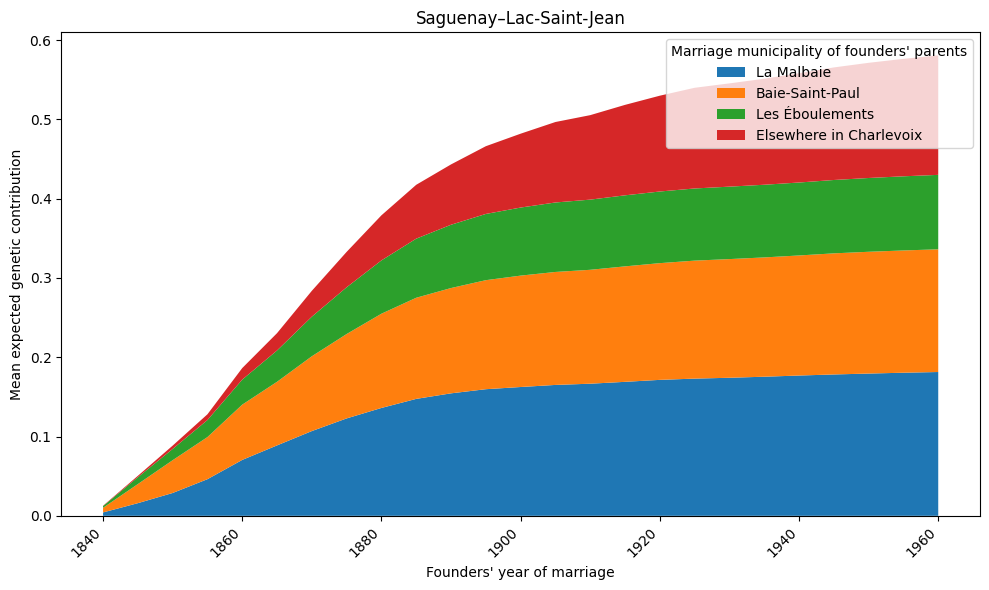

In [23]:
def categorize_origin(origin):
    return origin if origin in charlevoix_cities else "Elsewhere in Charlevoix"

gc_per_city_per_year = df.copy()
gc_sum = gc_per_city_per_year["Individual GC"].sum()
gc_per_city_per_year = gc_per_city_per_year[gc_per_city_per_year["Region"] == "Charlevoix"]
gc_per_city_per_year["Origin"] = gc_per_city_per_year["Origin"].apply(categorize_origin)
gc_per_city_per_year.drop(columns=["Founder ID", "Region", "Watercourse"], inplace=True)
gc_per_city_per_year = gc_per_city_per_year.groupby(by=["Year", "Origin"]).sum()
gc_per_city_per_year["Individual GC"] /= gc_sum
gc_per_city_per_year.reset_index(inplace=True)

# Pivot the DataFrame to have 'Origin' as columns
gc_pivot = gc_per_city_per_year.pivot(index='Year', columns='Origin', values='Individual GC')
gc_pivot = gc_pivot.fillna(0)

# Ensure all origin categories are present for each year
gc_pivot = gc_pivot.reindex(columns=charlevoix_cities + ["Elsewhere in Charlevoix"], fill_value=0)
gc_pivot.reset_index(inplace=True)
gc_pivot.set_index('Year', inplace=True)

# Create the stackplot
plt.figure(figsize=(10, 6))
plt.stackplot(gc_pivot.index, np.cumsum(gc_pivot.values.T, axis=1), labels=gc_pivot.columns)

# Customize the plot
plt.title('Saguenay–Lac-Saint-Jean')
plt.xlabel("Founders' year of marriage")
plt.ylabel('Mean expected genetic contribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title="Marriage municipality of founders' parents", loc='upper right')

# Display the plot
plt.tight_layout()

plt.show()

Plot the same graph but subdivided by watercourse.

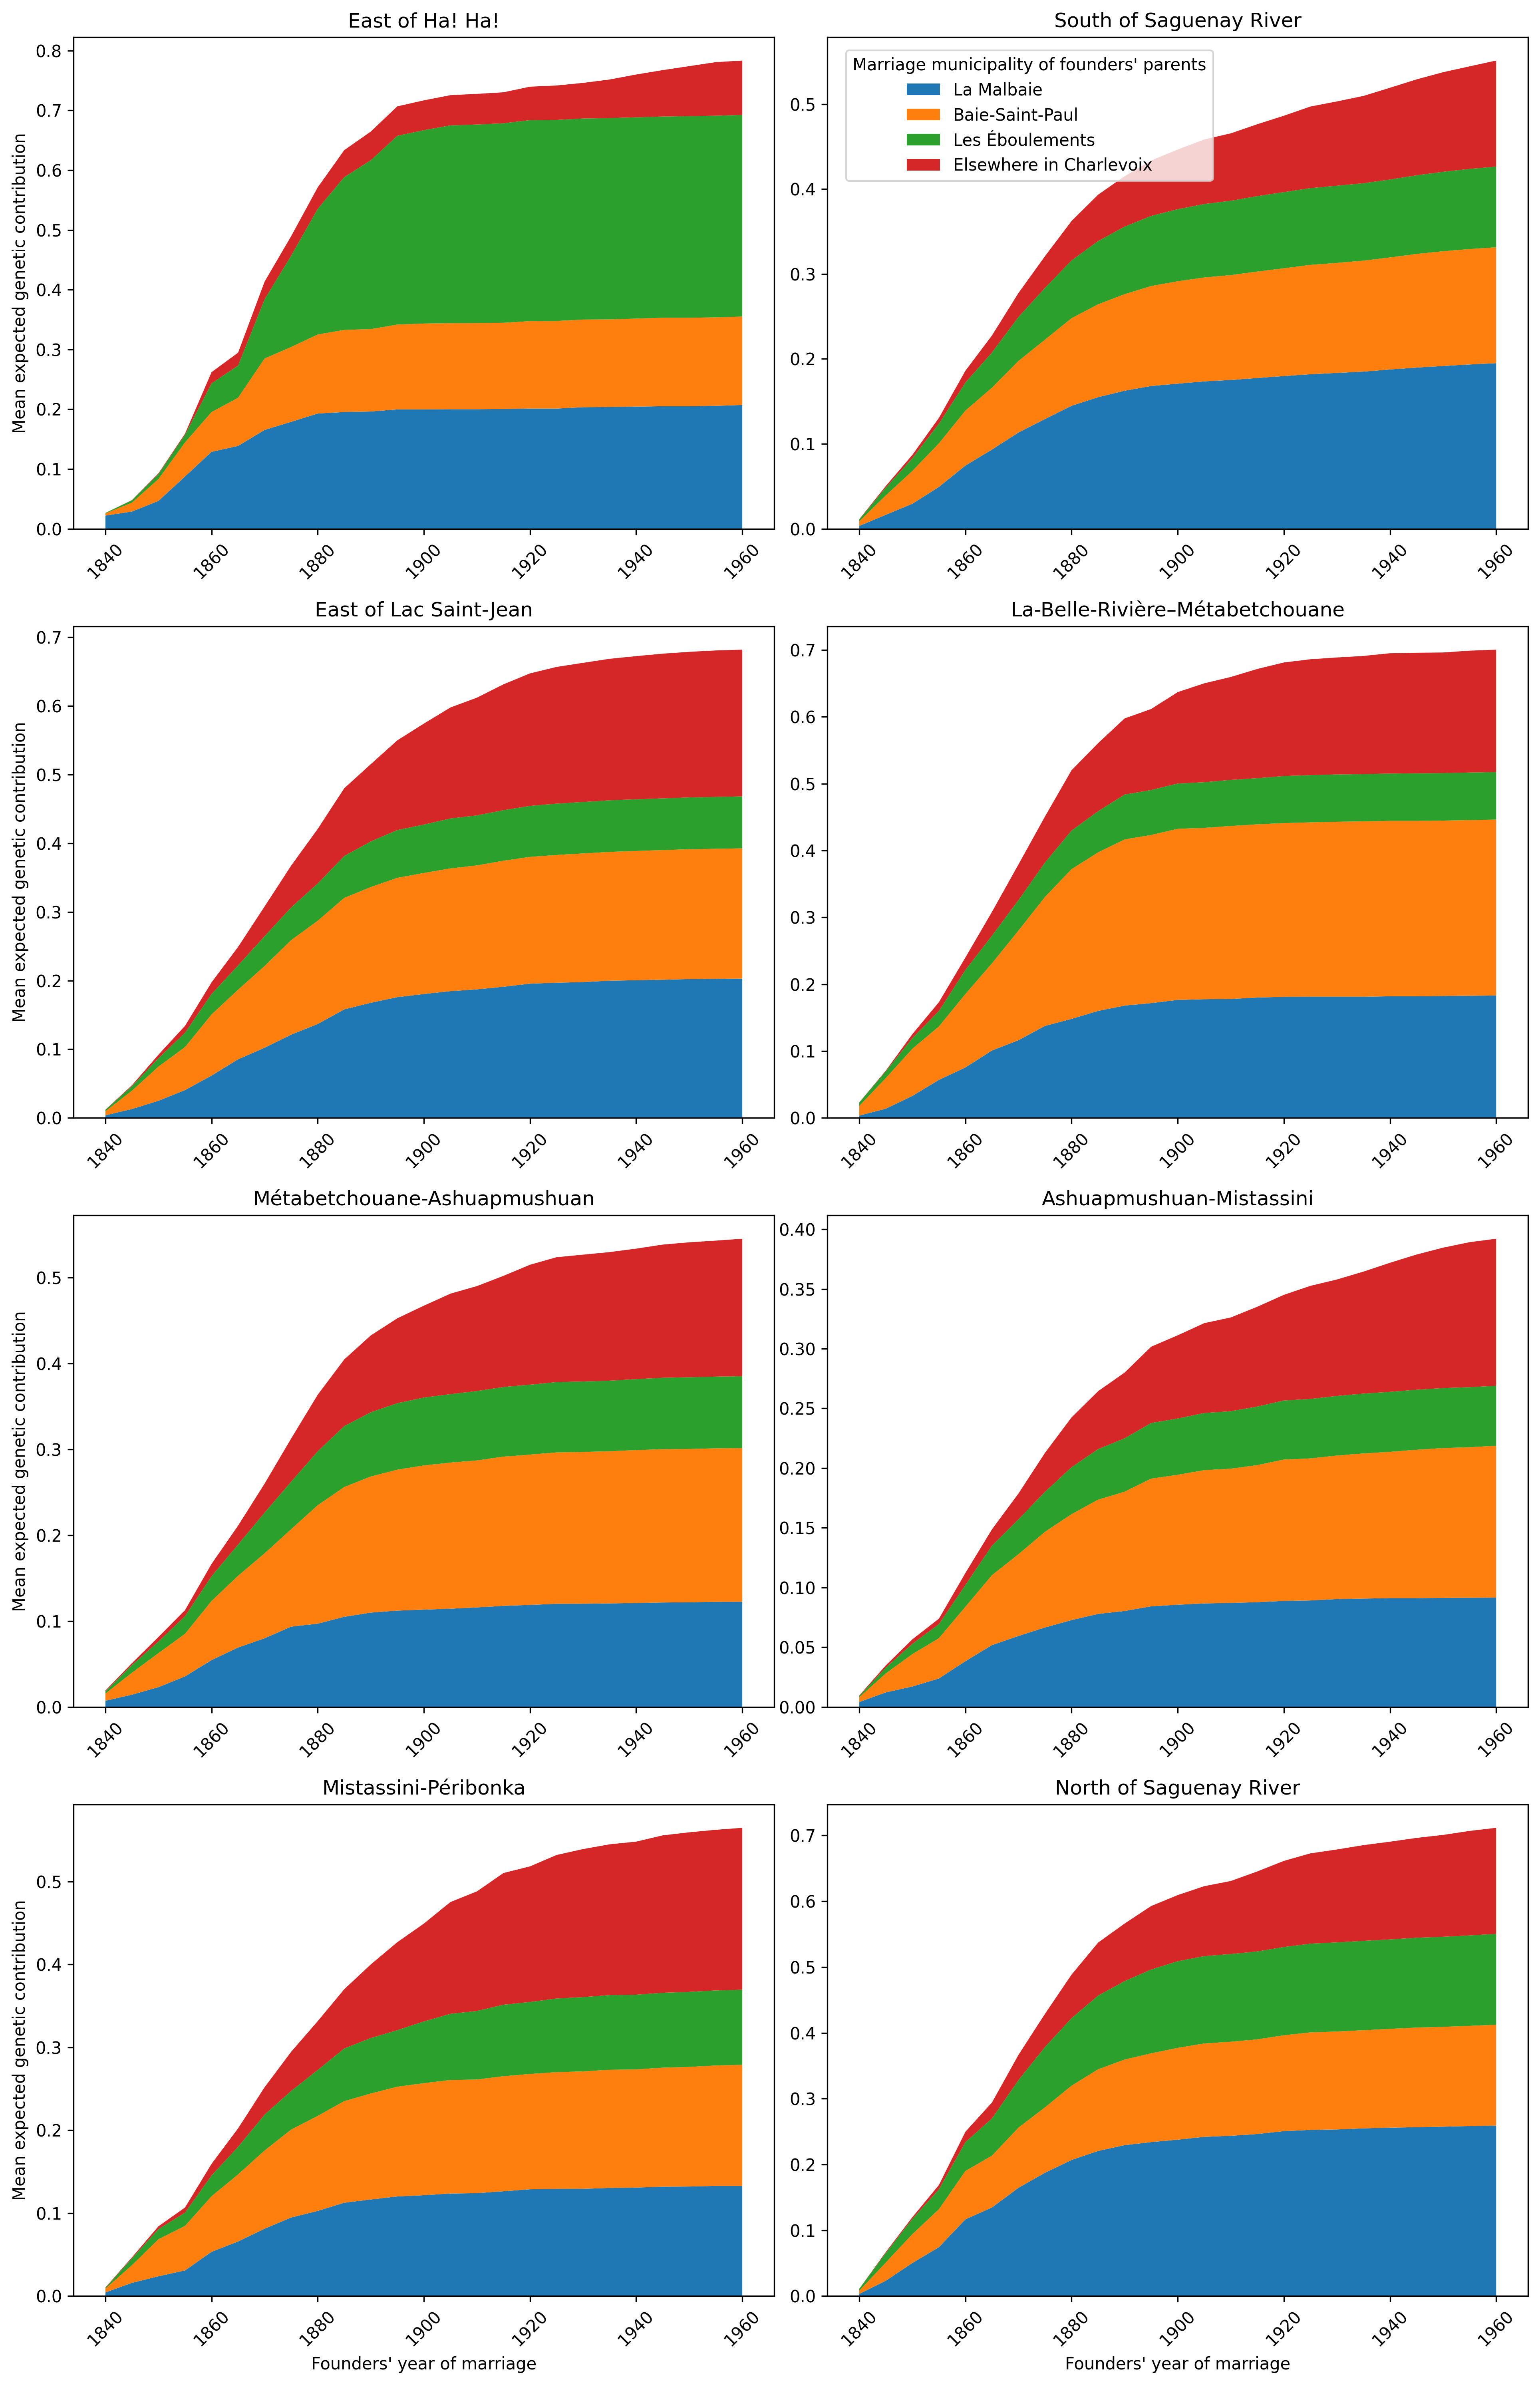

In [24]:
# 1. Define the lists of locations to iterate through
locations = [
    "East of Ha! Ha!", "South of Saguenay River",
    "East of Lac Saint-Jean", "La-Belle-Rivière–Métabetchouane",
    "Métabetchouane-Ashuapmushuan", "Ashuapmushuan-Mistassini",
    "Mistassini-Péribonka", "North of Saguenay River"
]

# Define the helper function once, outside the loop
def categorize_origin(origin):
    """Categorizes an origin city."""
    return origin if origin in charlevoix_cities else "Elsewhere in Charlevoix"

# 2. Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 20), dpi=300)

# Variables to store handles and labels for the single legend
legend_handles = []
legend_labels = []

# 3. Loop through each location to create its plot
for i, loc in enumerate(locations):
    # Determine the row and column for the current plot
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # --- Data Processing (specific to each location) ---
    gc_per_city_per_year = df[df["Watercourse"] == loc].copy()
    gc_sum = gc_per_city_per_year["Individual GC"].sum()

    # Continue if there's data to process
    if gc_sum > 0:
        gc_per_city_per_year = gc_per_city_per_year[gc_per_city_per_year["Region"] == "Charlevoix"]
        gc_per_city_per_year["Origin"] = gc_per_city_per_year["Origin"].apply(categorize_origin)
        gc_per_city_per_year.drop(columns=["Founder ID", "Region", "Watercourse"], inplace=True)
        gc_per_city_per_year = gc_per_city_per_year.groupby(by=["Year", "Origin"]).sum()
        gc_per_city_per_year["Individual GC"] /= gc_sum
        gc_per_city_per_year.reset_index(inplace=True)

        # Pivot the DataFrame for the stackplot
        gc_pivot = gc_per_city_per_year.pivot(index='Year', columns='Origin', values='Individual GC')
        gc_pivot = gc_pivot.fillna(0)
        gc_pivot = gc_pivot.reindex(columns=charlevoix_cities + ["Elsewhere in Charlevoix"], fill_value=0)
        
        # --- Plotting on the specific subplot axis ---
        collections = ax.stackplot(gc_pivot.index, np.cumsum(gc_pivot.values.T, axis=1), labels=gc_pivot.columns)
        
        # Save the handles/labels from the first plot for the shared legend
        if i == 0:
            legend_handles = collections
            legend_labels = gc_pivot.columns

    # --- Customize each subplot ---
    ax.set_title(loc)
    ax.tick_params(axis='x', rotation=45)

    # Set axis labels only for the outer plots to avoid clutter
    if col == 0: # Left column
        ax.set_ylabel('Mean expected genetic contribution')
    if row == 3: # Bottom row
        ax.set_xlabel("Founders' year of marriage")

# 4. Create a single, shared legend for the entire figure
fig.legend(
    legend_handles,
    legend_labels,
    title="Marriage municipality of founders' parents",
    loc='upper left',
    bbox_to_anchor=(0.44, 0.98) # Position legend outside the top-right plot
)

# 5. Adjust layout to prevent overlap and make room for the legend
plt.tight_layout()
fig.subplots_adjust(right=0.80) # Adjust the right boundary of the plot area

plt.savefig(paths['wd'] + "results/supp_figures/6.SubdivisionsContributionsCharlevoix.svg", bbox_inches='tight')
plt.show()

Assign a colour to each region of Quebec.

In [25]:
region_to_colour = {
    # ─── Greater Montréal cluster ───
    "Île-de-Montréal":                  'steelblue',
    "Rive Nord-Ouest de Montréal":      'darkturquoise',
    "Rive Sud de Montréal":             'darkslategray',
    "Outaouais":                        'saddlebrown',
    "Lanaudière":                       'lightsalmon',
    "Laurentides":                      'palevioletred',

    # ─── Québec City & Estrie ───
    "Région de Québec":                 'navy',
    "Agglomération de Québec":          'darkslateblue',
    "Côte-de-Beaupré":                  'chartreuse',
    "Portneuf":                         'limegreen',
    "Lévis-Lotbinière":                 'seagreen',
    "Côte-du-Sud":                      'springgreen',
    "Estrie":                           'green',

    # ─── Lower St. Lawrence & Gaspé ───
    "Bas-Saint-Laurent":                'yellow',
    "Saguenay–Lac-Saint-Jean":          'crimson',
    "Charlevoix":                       'orangered', # swapped between Côte-Nord and Charlevoix
    "Côte-Nord":                        'orange', # swapped
    "Gaspésie":                         'fuchsia',
    "Îles-de-la-Madeleine":             'violet',

    # ─── Interior & Far-north ───
    "Abitibi":                          'khaki',
    "Témiscamingue":                    'darkolivegreen',
    "Bois-Francs":                      'slategray',
    "Beauce":                           'olive',
    "Mauricie":                         'blue',
    "Nord du Québec":                   'blueviolet',
    "Richelieu":                        'darkmagenta',

    # ——— Nouveau-Brunswick ———
    "Nouveau-Brunswick":                'dodgerblue',

    # ─── Fallback ───
    "Unknown":                          'gainsboro',
}

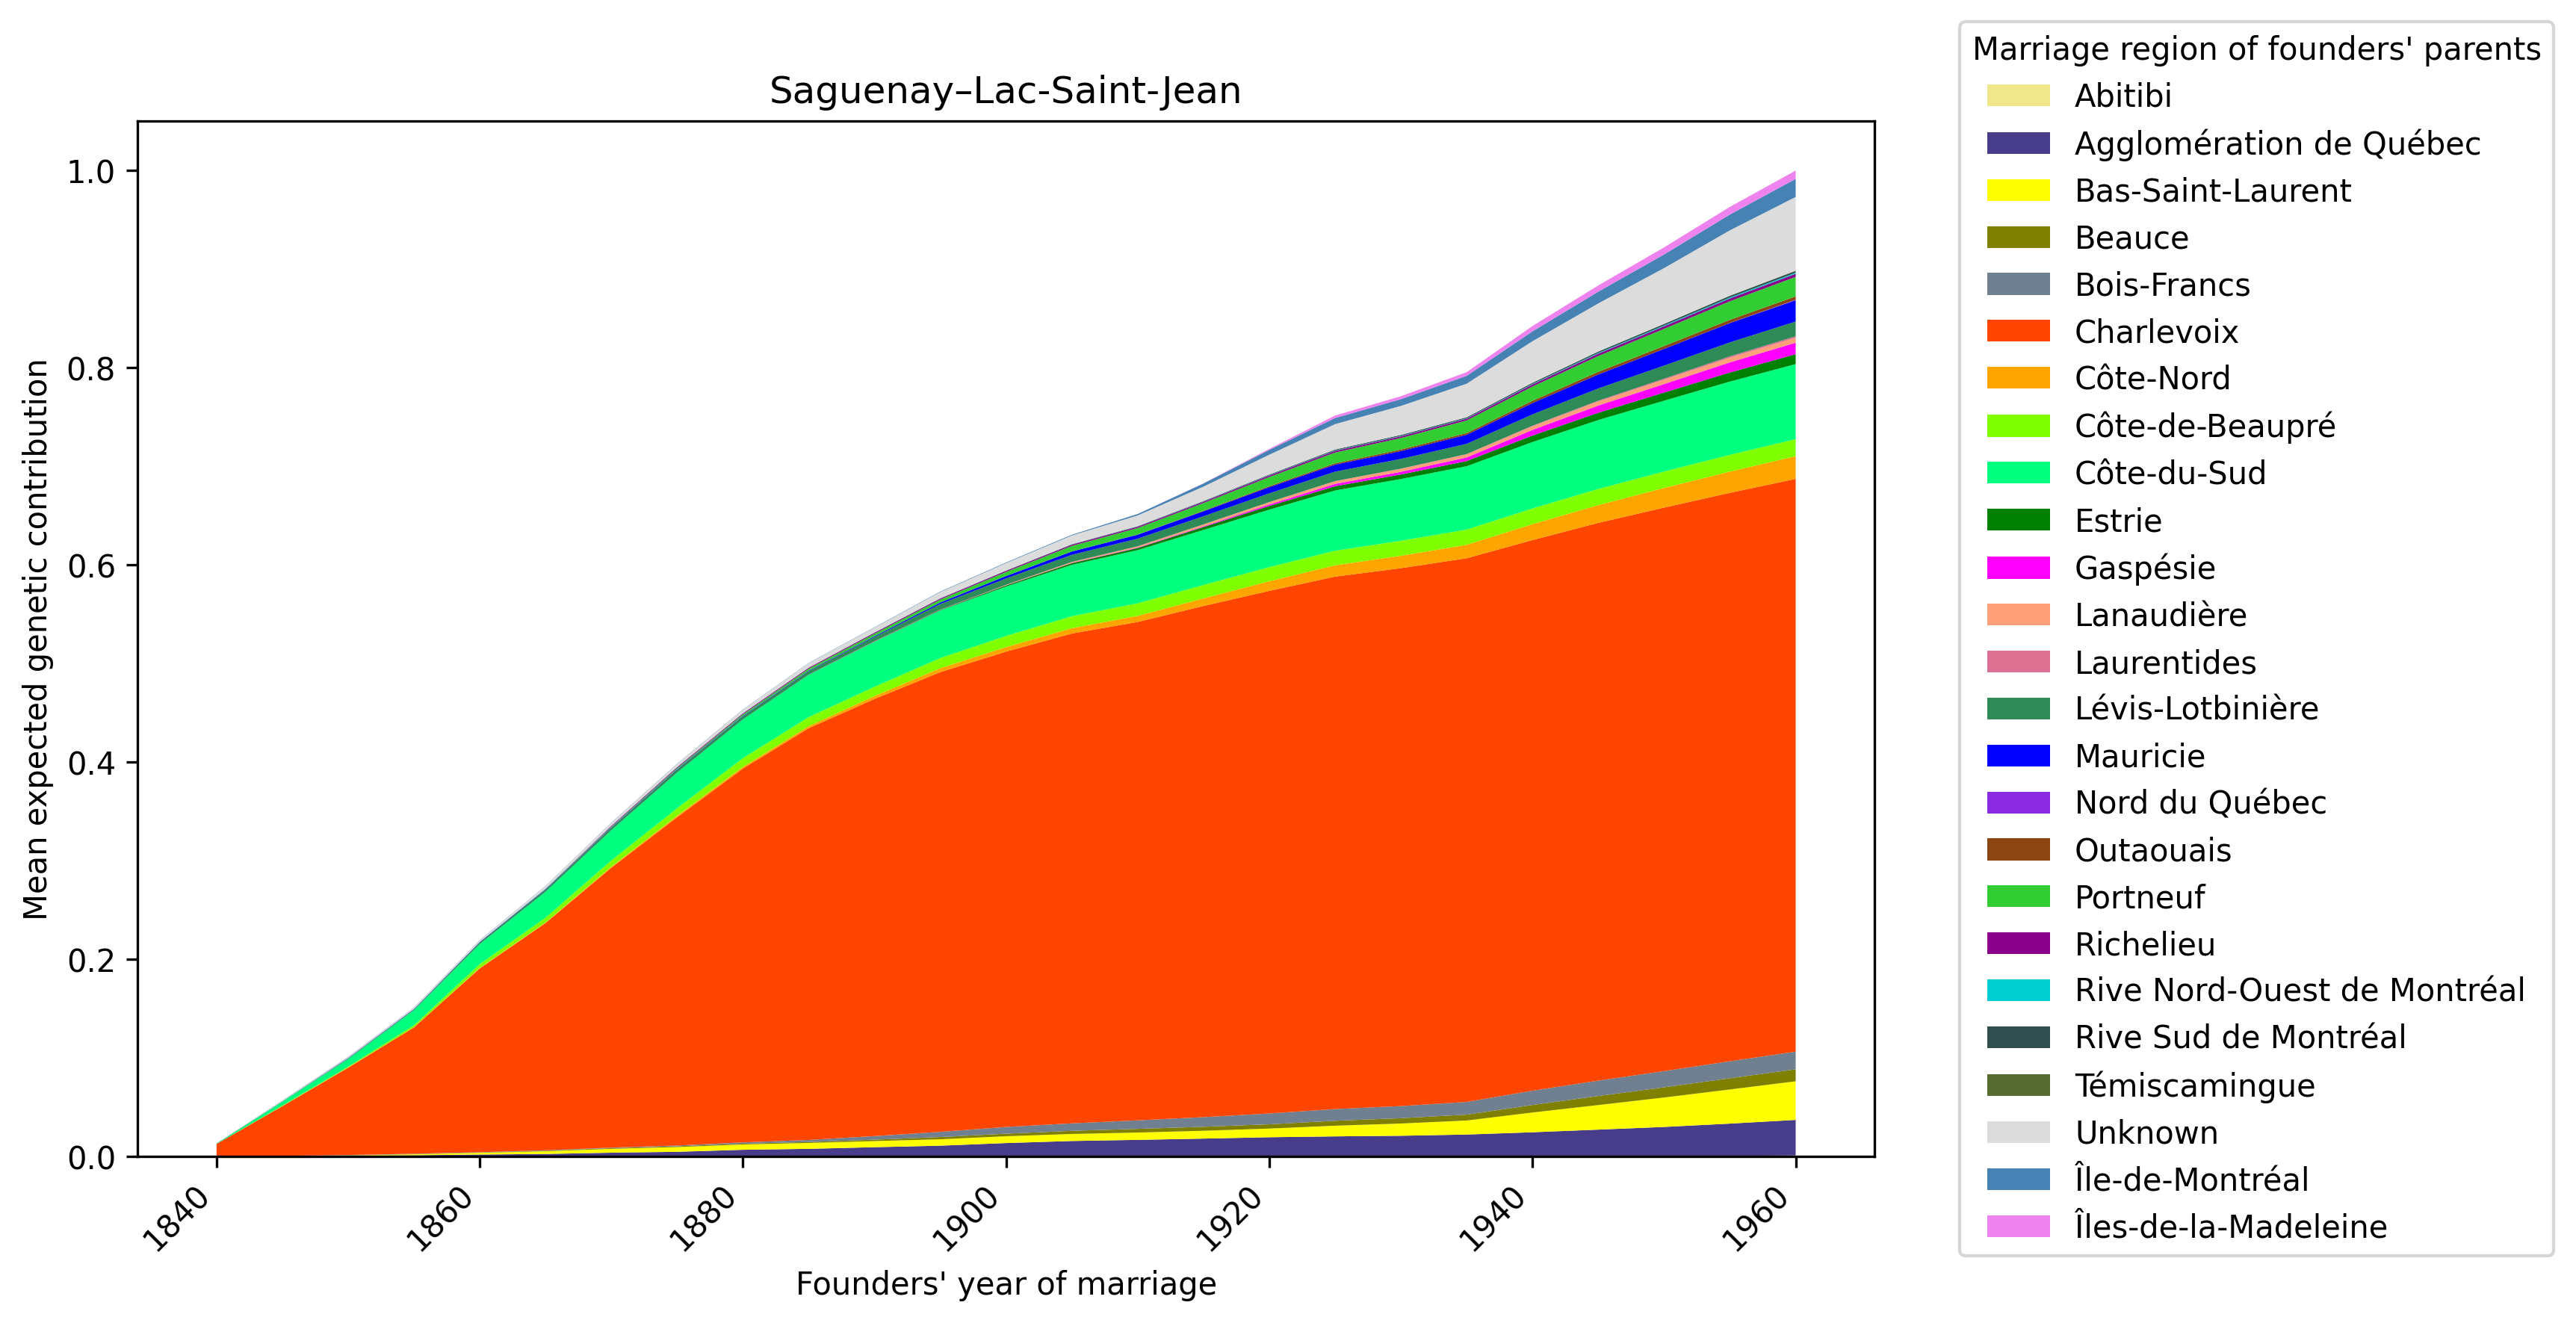

In [26]:
gc_per_region_per_year = df.copy()
gc_sum = df["Individual GC"].sum()
gc_per_region_per_year.drop(columns=["Founder ID", "Origin", "Watercourse"], inplace=True)
gc_per_region_per_year = gc_per_region_per_year.groupby(by=["Year", "Region"]).sum()
gc_per_region_per_year["Individual GC"] /= gc_sum
gc_per_region_per_year.reset_index(inplace=True)

# Pivot the DataFrame to have 'Origin' as columns
gc_pivot = gc_per_region_per_year.pivot(index='Year', columns='Region', values='Individual GC')
gc_pivot = gc_pivot.fillna(0)

# Ensure all origin categories are present for each year
gc_pivot = gc_pivot.reindex(columns=sorted(df["Region"].unique()), fill_value=0)
gc_pivot.reset_index(inplace=True)
gc_pivot.set_index('Year', inplace=True)

# Create the stackplot
fig = plt.figure(figsize=(10, 6), dpi=300)
colors = [region_to_colour[region] for region in gc_pivot.columns]
plt.stackplot(gc_pivot.index, np.cumsum(gc_pivot.values.T, axis=1), labels=gc_pivot.columns, colors=colors, linewidth=0)

# Customize the plot
plt.title('Saguenay–Lac-Saint-Jean')
plt.xlabel("Founders' year of marriage")
plt.ylabel('Mean expected genetic contribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Extract handles and labels BEFORE sorting
handles, labels = plt.gca().get_legend_handles_labels()

# Sort the labels and handles alphabetically
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))

# Create the legend with sorted entries
plt.legend(handles, labels, title="Marriage region of founders' parents", bbox_to_anchor=(1.4, 0.5), loc='center right')

plt.show()

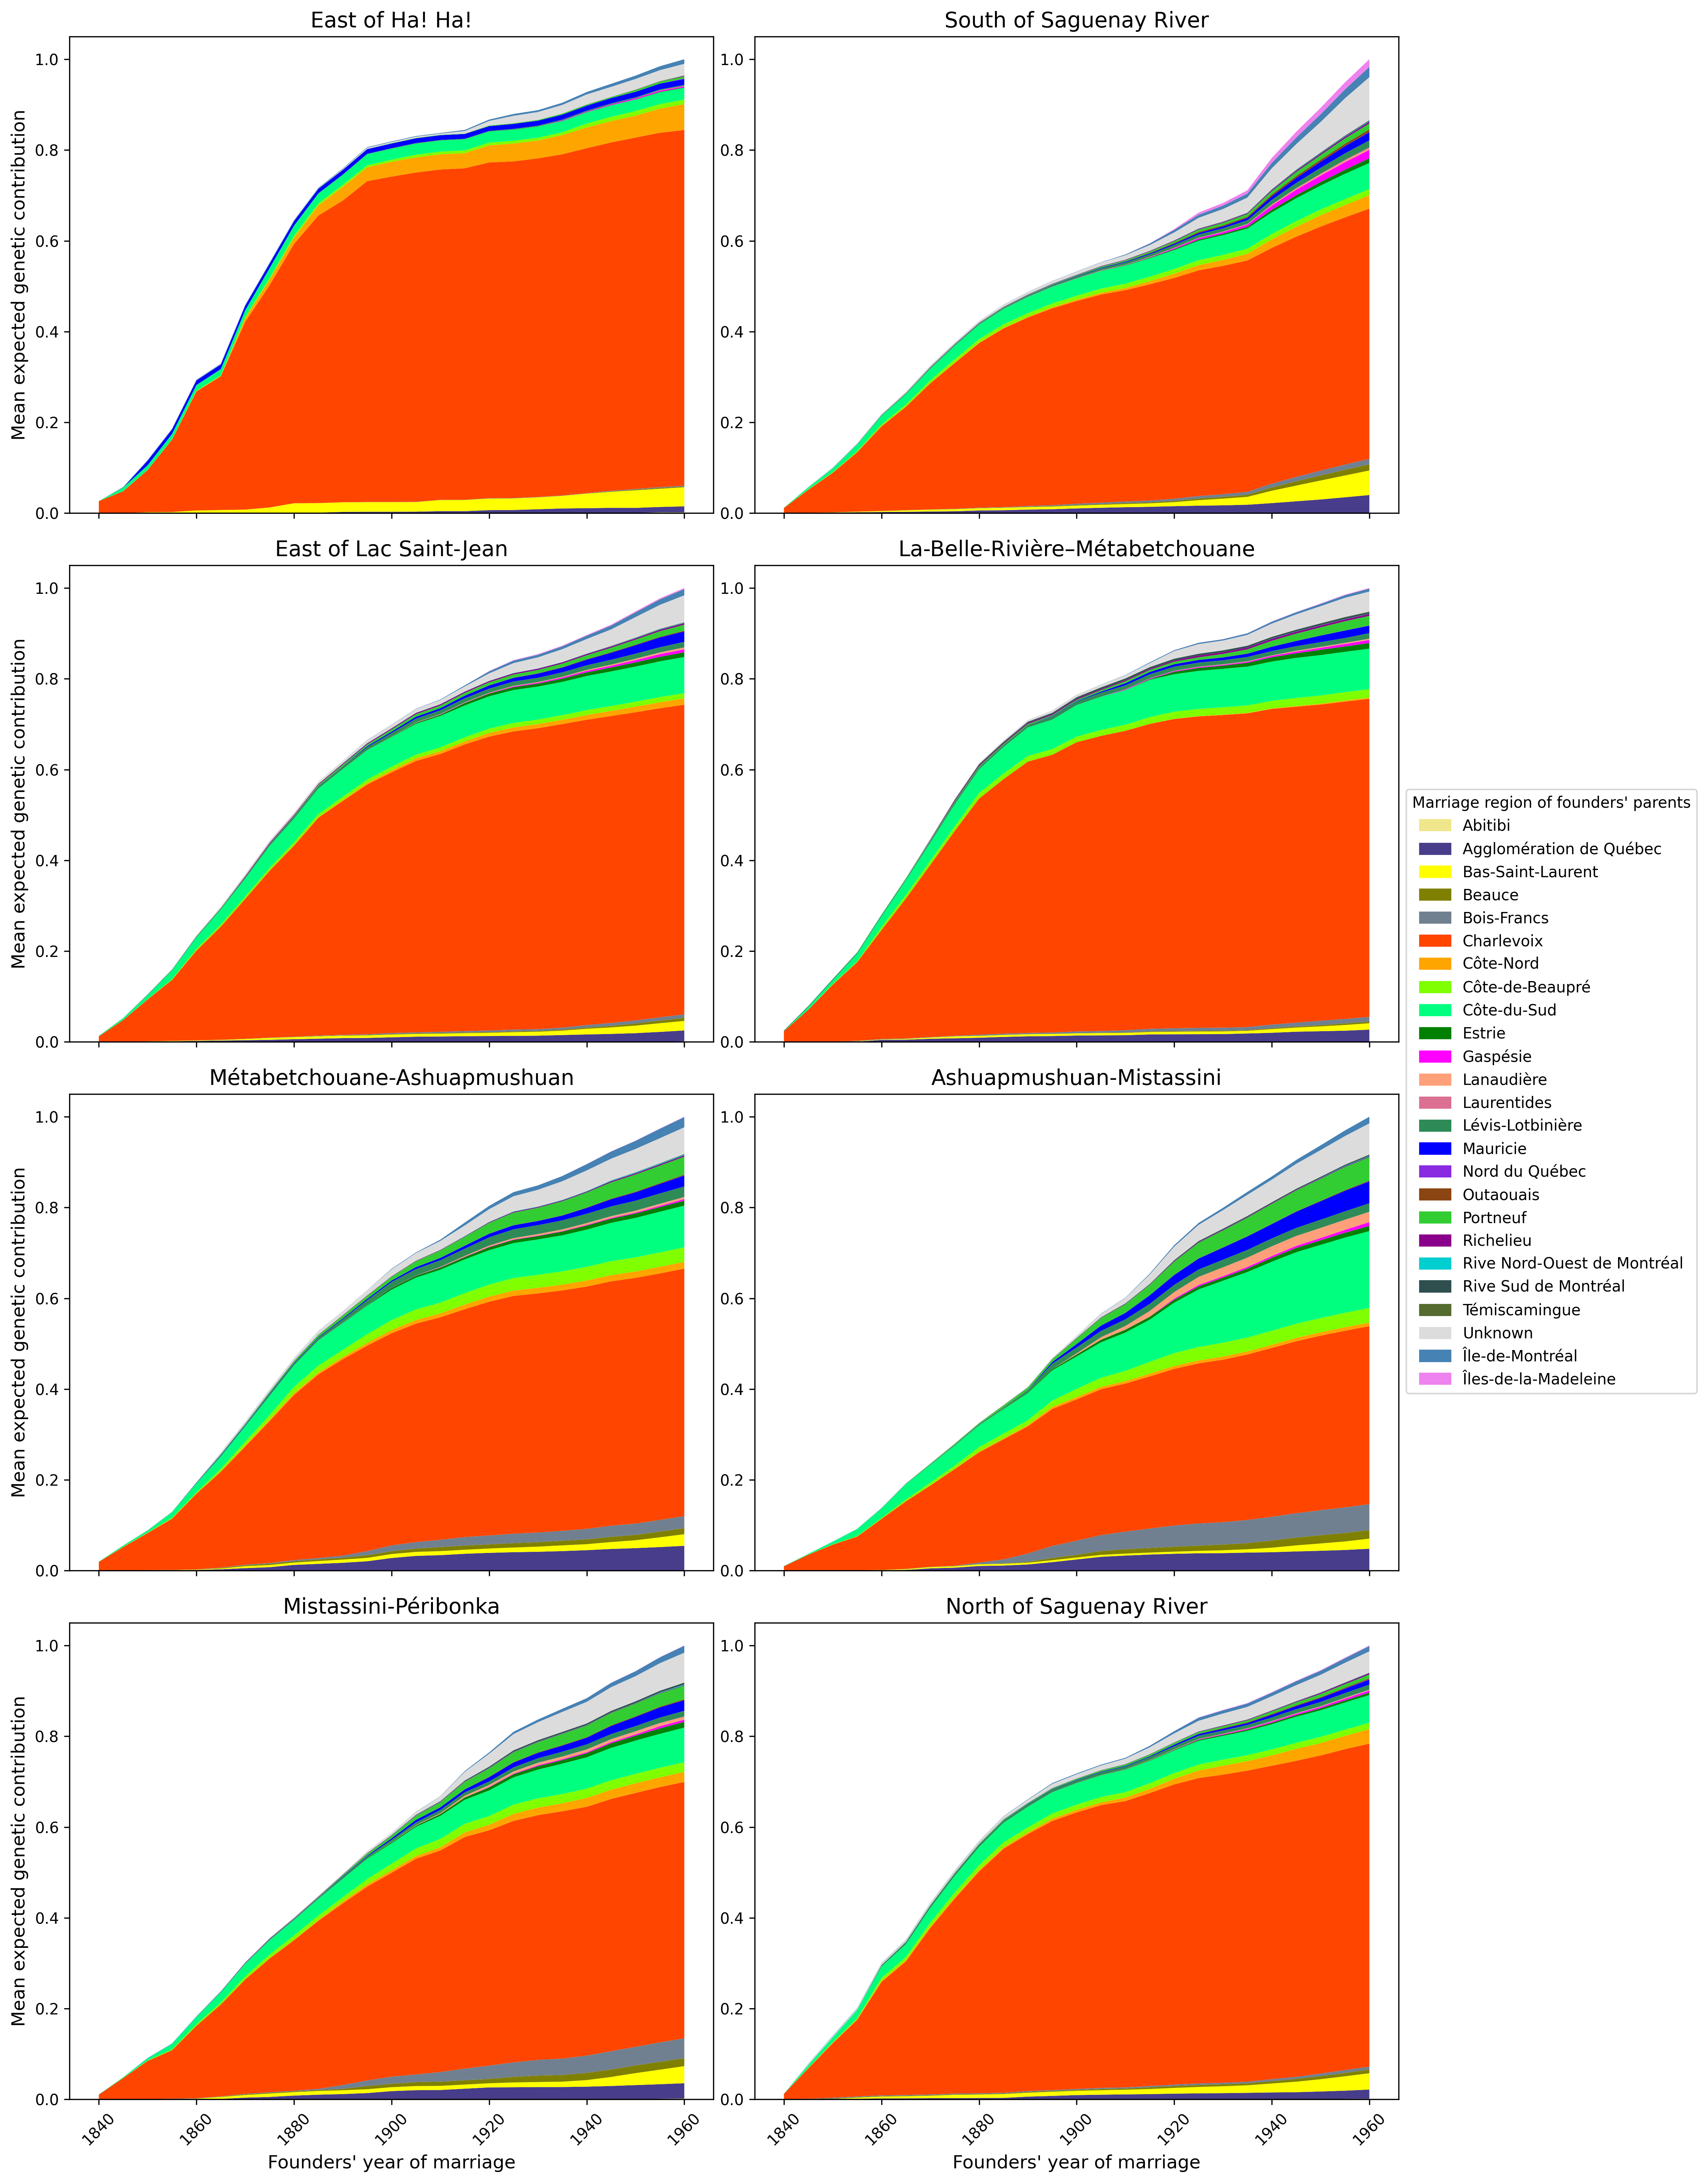

In [27]:
# 1. Define the lists of locations to iterate through
locations = [
    "East of Ha! Ha!", "South of Saguenay River",
    "East of Lac Saint-Jean", "La-Belle-Rivière–Métabetchouane",
    "Métabetchouane-Ashuapmushuan", "Ashuapmushuan-Mistassini",
    "Mistassini-Péribonka", "North of Saguenay River"
]

# 2. Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 20), dpi=300, sharex=True)

# Get the full list of regions for consistent ordering and colouring
all_regions_sorted = sorted(df["Region"].unique())

# 3. Loop through each location to create its plot
for i, loc in enumerate(locations):
    # Determine the row and column for the current plot
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # --- Data Processing (specific to each location) ---
    gc_per_region_per_year = df[df['Watercourse'] == loc].copy()
    
    # Use the total GC sum for normalization
    gc_sum = df[df['Watercourse'] == loc]["Individual GC"].sum()

    if not gc_per_region_per_year.empty and gc_sum > 0:
        gc_per_region_per_year.drop(columns=["Founder ID", "Origin", "Watercourse"], inplace=True)
        gc_per_region_per_year = gc_per_region_per_year.groupby(by=["Year", "Region"]).sum()
        gc_per_region_per_year["Individual GC"] /= gc_sum
        gc_per_region_per_year.reset_index(inplace=True)

        # Pivot the DataFrame for the stackplot
        gc_pivot = gc_per_region_per_year.pivot(index='Year', columns='Region', values='Individual GC')
        gc_pivot = gc_pivot.fillna(0)

        # Ensure all region columns are present and in the correct sorted order
        gc_pivot = gc_pivot.reindex(columns=all_regions_sorted, fill_value=0)

        # --- Plotting on the specific subplot axis ---
        colors = [region_to_colour.get(region, '#CCCCCC') for region in gc_pivot.columns] # Use .get for safety
        ax.stackplot(gc_pivot.index, np.cumsum(gc_pivot.values.T, axis=1), labels=gc_pivot.columns, colors=colors, linewidth=0)

    # --- Customize each subplot ---
    ax.set_title(loc, fontsize=14)
    ax.tick_params(axis='x', rotation=45)

    # Set axis labels only for the outer plots to avoid clutter
    if col == 0: # Left column
        ax.set_ylabel('Mean expected genetic contribution', fontsize=12)
    if row == 3: # Bottom row
        ax.set_xlabel("Founders' year of marriage", fontsize=12)

# 4. Create a single, shared legend for the entire figure
#    We can build the handles and labels from our known sorted list of regions
handles = [plt.Rectangle((0,0),1,1, color=region_to_colour.get(r, '#CCCCCC')) for r in all_regions_sorted]
labels = all_regions_sorted

fig.legend(
    handles,
    labels,
    title="Marriage region of founders' parents",
    loc='center left',
    bbox_to_anchor=(0.8, 0.5) # Position legend outside the plots
)

# 5. Adjust layout to prevent overlap and make room for the legend
plt.tight_layout()
fig.subplots_adjust(right=0.80) # Adjust the right boundary to fit the legend

plt.savefig(paths['wd'] + "results/supp_figures/7.SLSJContributionsQuebec.svg", bbox_inches='tight')
plt.show()